<a href="https://colab.research.google.com/github/wa-le/Early-diabetes-risk-prediction/blob/master/early_diabetes_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ydata-profiling

In [98]:
from ydata_profiling import ProfileReport

### Dataset Source - https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset

In [99]:
import datetime
print(f"Last updated: {datetime.datetime.now()}")

Last updated: 2023-11-04 13:55:54.406462


In [100]:
# Tools needed

# EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [101]:
cd /content/drive/MyDrive/MY-ML

/content/drive/MyDrive/MY-ML


# Load Data

In [102]:
df_diabetes = pd.read_csv("/content/drive/MyDrive/MY-ML/data/diabetes_data_upload.csv")
df_diabetes.shape

(520, 17)

In [103]:
df_diabetes

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


# Pandas Profiling for quick EDA

In [104]:
profile = ProfileReport(df_diabetes, title="Profiling Report")

In [105]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#Clean and Preprocess Data

In [106]:
df_diabetes.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [107]:
df_diabetes.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [108]:
df_diabetes.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [109]:
for i in df_diabetes.columns:
  print(i)
  print(df_diabetes[i].value_counts())
  print(len(df_diabetes[i].value_counts()))
  print()

Age
35    30
48    28
30    25
43    25
40    24
55    22
47    21
38    20
53    20
45    18
58    18
50    18
54    16
39    16
57    15
60    15
68    10
28     9
42     9
72     9
66     9
36     8
61     8
56     8
46     8
67     8
62     7
37     7
49     7
44     7
27     6
34     6
65     6
32     5
69     5
51     5
70     5
64     5
33     4
59     4
41     4
52     4
63     3
31     3
90     2
85     2
25     2
79     1
16     1
29     1
26     1
Name: Age, dtype: int64
51

Gender
Male      328
Female    192
Name: Gender, dtype: int64
2

Polyuria
No     262
Yes    258
Name: Polyuria, dtype: int64
2

Polydipsia
No     287
Yes    233
Name: Polydipsia, dtype: int64
2

sudden weight loss
No     303
Yes    217
Name: sudden weight loss, dtype: int64
2

weakness
Yes    305
No     215
Name: weakness, dtype: int64
2

Polyphagia
No     283
Yes    237
Name: Polyphagia, dtype: int64
2

Genital thrush
No     404
Yes    116
Name: Genital thrush, dtype: int64
2

visual blurring
No     287

In [110]:
df_diabetes.nunique()

Age                   51
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64

In [111]:
# Check for duplicate rows
df = df_diabetes.copy()
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [112]:
# Drop all duplicates in the DataFrame
df = df.drop_duplicates()

#for dropping duplicates based on certain columns
#df = df.drop_duplicates(subset=['column1', 'column2'])

In [113]:
df = df.reset_index(drop = True)
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
247,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
248,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
249,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


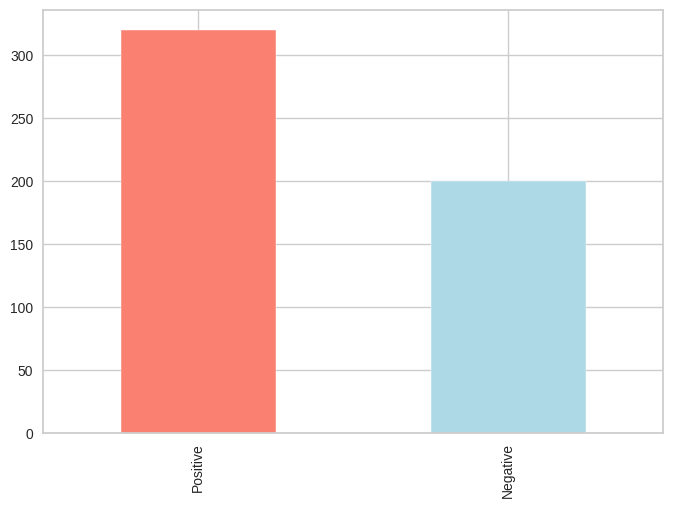

In [114]:
df_diabetes["class"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

# Split Dataset

In [115]:
# convert class feature to numerical
df["class"] = np.where(df["class"] == "Negative", 0, 1)

In [116]:
df["class"].value_counts()

1    173
0     78
Name: class, dtype: int64

In [117]:
# convert Gender feature to numerical
df["Gender"] = np.where(df["Gender"] == "Male", 0, 1)

In [118]:
to_num = list(df.columns)[2:-1]
to_num

['Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity']

In [119]:
# convert other features to numerical

for each in to_num:
  df[each] = np.where(df[each] == "No", 0, 1)

In [120]:
df_diabetes2 = df.copy()

In [121]:
df_diabetes2

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,39,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
247,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
248,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
249,32,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [122]:
# Everything except target variable
X = df.drop("class", axis=1)

# Target variable
y = df["class"]

In [123]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Feature Scaling
We have two types:
- Min-Max Normalization(MinMaxScaler)
- Z-Score Normalization(StandardScaler)

# Converting Categorical features to Numerical
  - OneHotEncoding
  - or Dummies

In [124]:
"""from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer"""

'from sklearn.preprocessing import OneHotEncoder\nfrom sklearn.compose import ColumnTransformer'

In [125]:
"""cat_features=list(X.columns)[1:]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  cat_features,)],
                                remainder="passthrough")

tf_X = transformer.fit_transform(X)
tf_X"""

'cat_features=list(X.columns)[1:]\none_hot = OneHotEncoder()\ntransformer = ColumnTransformer([("one_hot",\n                                  one_hot,\n                                  cat_features,)],\n                                remainder="passthrough")\n\ntf_X = transformer.fit_transform(X)\ntf_X'

In [126]:
"""tf_X = pd.DataFrame(tf_X)"""

'tf_X = pd.DataFrame(tf_X)'

## Feature Scaling is Unnecessary for Random Forest Classification

In [127]:
"""
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaled_tf_X = scaling.fit_transform(tf_X)
scaled_tf_X
"""

'\nfrom sklearn.preprocessing import StandardScaler\nscaling=StandardScaler()\nscaled_tf_X = scaling.fit_transform(tf_X)\nscaled_tf_X\n'

In [128]:
"""
scaled_tf_X = pd.DataFrame(scaled_tf_X)
scaled_tf_X
"""

'\nscaled_tf_X = pd.DataFrame(scaled_tf_X)\nscaled_tf_X\n'

# Fit Various Models to see the best

In [129]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.8235294117647058,
 'KNN': 0.7647058823529411,
 'Random Forest': 0.9019607843137255}

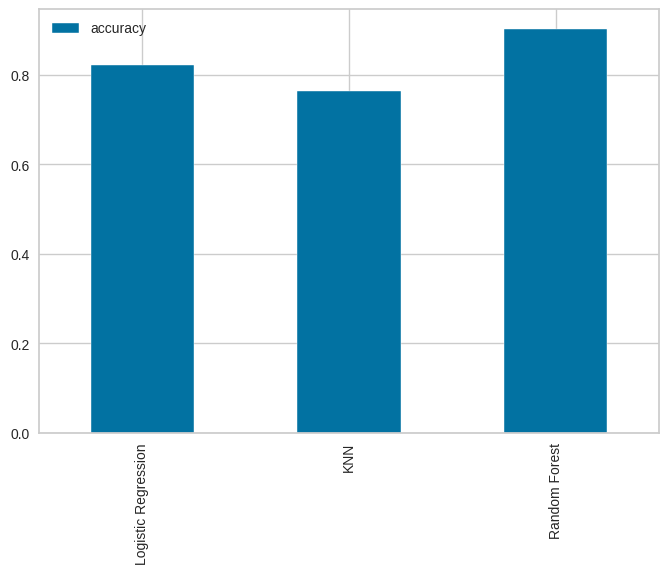

In [130]:
# Compare Models

compare_models = pd.DataFrame(model_scores, index=["accuracy"])
compare_models.T.plot.bar();

# Hyperparameter Tuning

In [131]:
# Create a hyperparameter grid for RandomForestClassifier
rforest_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [132]:
# another grid to try
rforest_grid2 = {
	'n_estimators': [25, 50, 100, 150],
	'max_features': ['sqrt', 'log2', None],
	'max_depth': [3, 6, 9],
	'max_leaf_nodes': [3, 6, 9],
  "min_samples_split": np.arange(2, 20, 2),
  "min_samples_leaf": np.arange(1, 20, 2)
}


### Using RandomSearchCV

In [133]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rforest = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rforest_grid,
                           cv=5,
                           n_iter=10,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rforest.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='sqrt',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100,
                                                    n_jobs=None,
                                                    oob_score=False,
                                                    ra...
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=True)

In [134]:
# Find the best hyperparameters
rs_rforest.best_params_

{'n_estimators': 260,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [135]:
rs_rforest.score(X_test, y_test)

0.8823529411764706

#### Our RF classifier out of the box seems better

### Using GridSearchCV

In [136]:
"""gs_rforest = GridSearchCV(RandomForestClassifier(),
                          param_grid=rforest_grid,
                          cv=5,
                          verbose=True)

gs_rforest.fit(X_train, y_train)"""

'gs_rforest = GridSearchCV(RandomForestClassifier(),\n                          param_grid=rforest_grid,\n                          cv=5,\n                          verbose=True)\n\ngs_rforest.fit(X_train, y_train)'

#### GridSearchCV taking too long, stopped it!

# Evaluating Our Model Beyond RF Classifier


* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

Using Cross Validation where possible.

To make comparisons and evaluate our trained model, we make predictions first.

In [137]:
# Checkout Best Model again

np.random.seed(42)

rf = RandomForestClassifier()

rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9019607843137255

In [138]:
pd.DataFrame(X_test)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
155,55,0,1,1,1,1,0,1,0,0,1,0,1,0,0,0
6,57,0,1,1,0,1,1,1,0,0,0,1,1,0,0,0
164,61,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0
60,65,1,1,1,0,1,1,0,0,1,0,0,1,1,0,0
113,55,1,1,0,1,0,0,1,1,1,0,1,1,0,0,0
182,45,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
198,56,0,0,1,0,1,1,0,1,1,0,1,0,1,1,0
248,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1
9,70,0,0,1,1,1,1,0,1,1,1,0,0,0,1,0
118,34,1,1,1,0,1,0,0,0,0,1,0,0,1,0,0


In [139]:
y_preds = rf.predict(X_test)

In [140]:
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1])

In [141]:
np.array(y_test)

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0])

In [142]:
y_preds_proba = rf.predict_proba(X_test)

In [143]:
y_preds_proba

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.14, 0.86],
       [0.02, 0.98],
       [0.07, 0.93],
       [0.42, 0.58],
       [0.27, 0.73],
       [0.01, 0.99],
       [0.17, 0.83],
       [0.03, 0.97],
       [0.63, 0.37],
       [0.37, 0.63],
       [0.81, 0.19],
       [0.09, 0.91],
       [0.15, 0.85],
       [0.95, 0.05],
       [0.96, 0.04],
       [0.03, 0.97],
       [0.  , 1.  ],
       [0.02, 0.98],
       [0.92, 0.08],
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.61, 0.39],
       [0.64, 0.36],
       [0.23, 0.77],
       [0.35, 0.65],
       [0.09, 0.91],
       [0.  , 1.  ],
       [0.67, 0.33],
       [0.79, 0.21],
       [0.04, 0.96],
       [0.81, 0.19],
       [0.61, 0.39],
       [0.46, 0.54],
       [0.27, 0.73],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.09, 0.91],
       [0.  , 1.  ],
       [0.03, 0.97],
       [0.07, 0.93],
       [0.01, 0.99],
       [0.3 , 0.7 ],
       [0.9 , 0.1 ],
       [0.02, 0.98],
       [0.32, 0.68],
       [0.  ,

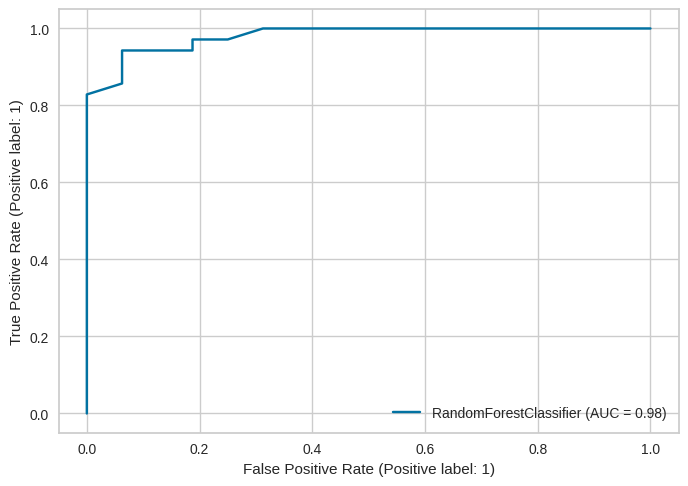

In [144]:
RocCurveDisplay.from_estimator(rf, X_test, y_test)

In [145]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[12  4]
 [ 1 34]]


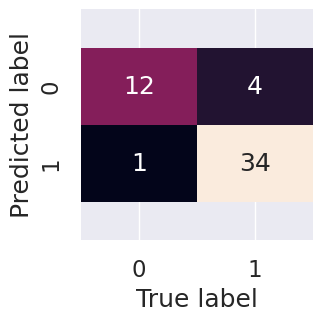

In [146]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test, y_preds)

In [147]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83        16
           1       0.89      0.97      0.93        35

    accuracy                           0.90        51
   macro avg       0.91      0.86      0.88        51
weighted avg       0.90      0.90      0.90        51



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [148]:
# Check and use best hyperparameters here if we tuned

In [149]:
# Cross-validated accuracy
cv_acc = cross_val_score(rf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.92156863, 0.96      , 0.9       , 0.86      , 0.94      ])

In [150]:
cv_acc = np.mean(cv_acc)
cv_acc

0.916313725490196

In [151]:
# Cross-validated precision
cv_precision = cross_val_score(rf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.9456911715735246

In [152]:
# Cross-validated recall
cv_recall = cross_val_score(rf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9484033613445378

In [153]:
# Cross-validated f1-score
cv_f1 = cross_val_score(rf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.9338445285397279

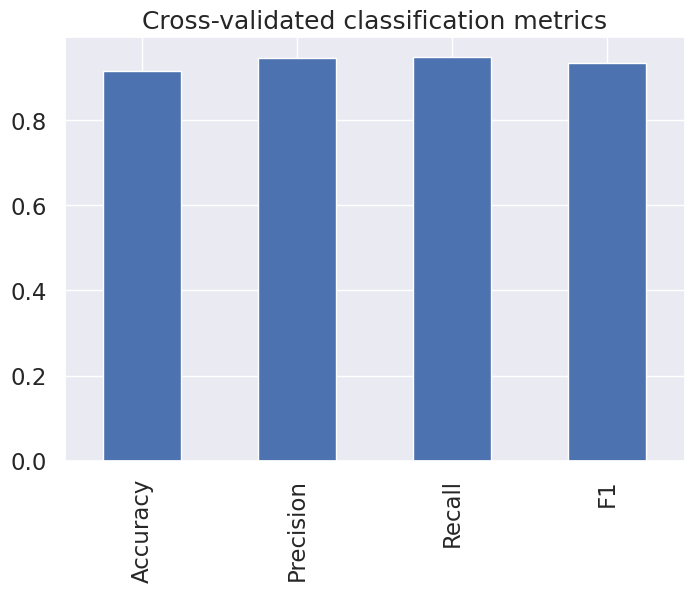

In [154]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

# Feature Importance

In [155]:
feature_importance = rf.feature_importances_

In [156]:
feature_importance

array([0.099509  , 0.05693364, 0.20378579, 0.18413771, 0.05238172,
       0.0222838 , 0.0400973 , 0.05345172, 0.03044315, 0.03464887,
       0.03667822, 0.03385287, 0.05296878, 0.03567219, 0.04500783,
       0.01814742])

In [157]:
# Match features to columns
features_dict = dict(zip(df_diabetes2.columns, list(feature_importance)))
features_dict

{'Age': 0.09950900065851548,
 'Gender': 0.05693363625134287,
 'Polyuria': 0.20378578619461976,
 'Polydipsia': 0.1841377096831928,
 'sudden weight loss': 0.052381719437942946,
 'weakness': 0.022283801663288014,
 'Polyphagia': 0.04009730078566077,
 'Genital thrush': 0.05345172150358041,
 'visual blurring': 0.03044314826708837,
 'Itching': 0.03464886917758446,
 'Irritability': 0.0366782198711849,
 'delayed healing': 0.033852871605997634,
 'partial paresis': 0.05296877815177366,
 'muscle stiffness': 0.03567218779321771,
 'Alopecia': 0.04500782990214855,
 'Obesity': 0.018147419052861838}

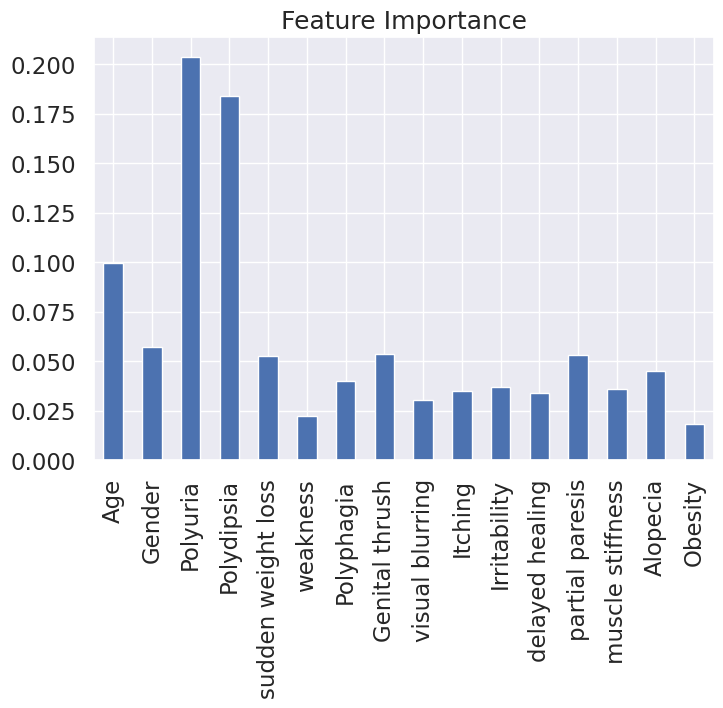

In [158]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [159]:
list(df_diabetes2.columns)[1:-1]

['Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity']

In [160]:
for each in list(df_diabetes2.columns)[1:-1]:
  print(f"{each}")
  display(pd.crosstab(df_diabetes2[each], df["class"]))
  print("-------------------")

Gender


class,0,1
Gender,,
0,67,93
1,11,80


-------------------
Polyuria


class,0,1
Polyuria,,
0,73,46
1,5,127


-------------------
Polydipsia


class,0,1
Polydipsia,,
0,74,53
1,4,120


-------------------
sudden weight loss


class,0,1
sudden weight loss,,
0,67,80
1,11,93


-------------------
weakness


class,0,1
weakness,,
0,37,55
1,41,118


-------------------
Polyphagia


class,0,1
Polyphagia,,
0,60,74
1,18,99


-------------------
Genital thrush


class,0,1
Genital thrush,,
0,67,117
1,11,56


-------------------
visual blurring


class,0,1
visual blurring,,
0,55,85
1,23,88


-------------------
Itching


class,0,1
Itching,,
0,37,87
1,41,86


-------------------
Irritability


class,0,1
Irritability,,
0,70,110
1,8,63


-------------------
delayed healing


class,0,1
delayed healing,,
0,42,84
1,36,89


-------------------
partial paresis


class,0,1
partial paresis,,
0,64,75
1,14,98


-------------------
muscle stiffness


class,0,1
muscle stiffness,,
0,54,99
1,24,74


-------------------
Alopecia


class,0,1
Alopecia,,
0,39,122
1,39,51


-------------------
Obesity


class,0,1
Obesity,,
0,68,139
1,10,34


-------------------


# Save Model using Pickle

In [172]:
import pickle

In [173]:
# Save the model to a file using pickle
with open('diabetes1.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [174]:
# Load the model from the saved file
with open('diabetes1.pkl', 'rb') as file:
  loaded_model = pickle.load(file)


In [176]:
loaded_model.score(X_test, y_test)

0.9019607843137255

# Using PYCARET
# Site - https://pycaret.gitbook.io/docs/get-started/tutorials

In [162]:
# Using Pycaret
# install full version
!pip install pycaret[full]

In [163]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(X, target = y, session_id = 123)

# or s = setup(pd.DataFrame(tf_X, y).reset_index(), target = "class", session_id = 123) - because i splitted the data initially

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Original data shape,"(251, 17)"
4,Transformed data shape,"(251, 17)"
5,Transformed train set shape,"(175, 17)"
6,Transformed test set shape,"(76, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [164]:
caret_result = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9147,0.9742,0.9250,0.9531,0.9364,0.8040,0.8159,2.8980
gbc,Gradient Boosting Classifier,0.9092,0.9485,0.9256,0.9483,0.9337,0.7869,0.8027,0.2650
xgboost,Extreme Gradient Boosting,0.9092,0.9510,0.9333,0.9402,0.9336,0.7831,0.7995,0.2920
rf,Random Forest Classifier,0.9085,0.9735,0.9333,0.9397,0.9329,0.7829,0.8004,0.6050
et,Extra Trees Classifier,0.9029,0.9744,0.9333,0.9320,0.9289,0.7692,0.7876,0.3990
qda,Quadratic Discriminant Analysis,0.8977,0.9607,0.9833,0.8836,0.9300,0.7381,0.7600,0.0990
nb,Naive Bayes,0.8853,0.9306,0.9000,0.9386,0.9133,0.7371,0.7570,0.0570
lightgbm,Light Gradient Boosting Machine,0.8807,0.9500,0.9167,0.9212,0.9139,0.7120,0.7375,1.2400
lda,Linear Discriminant Analysis,0.8745,0.9450,0.8513,0.9683,0.9018,0.7272,0.7487,0.0570
dt,Decision Tree Classifier,0.8690,0.8578,0.8923,0.9228,0.9047,0.6937,0.7039,0.0530


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

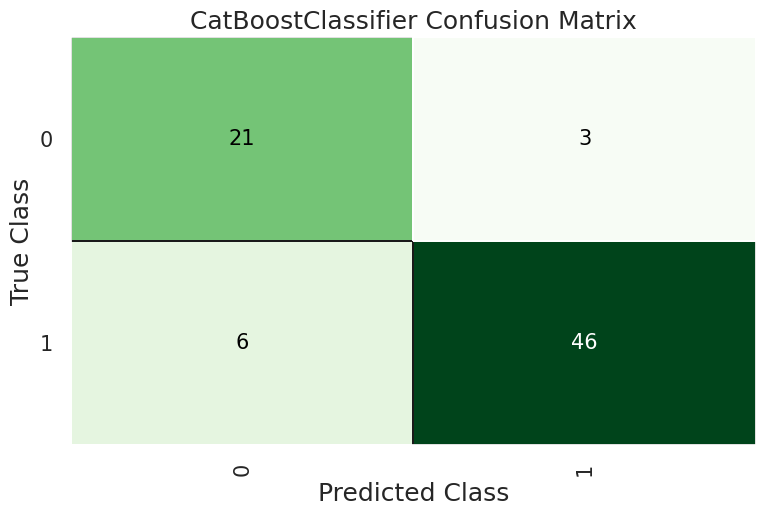

In [165]:
# plot confusion matrix
plot_model(caret_result, plot = 'confusion_matrix')

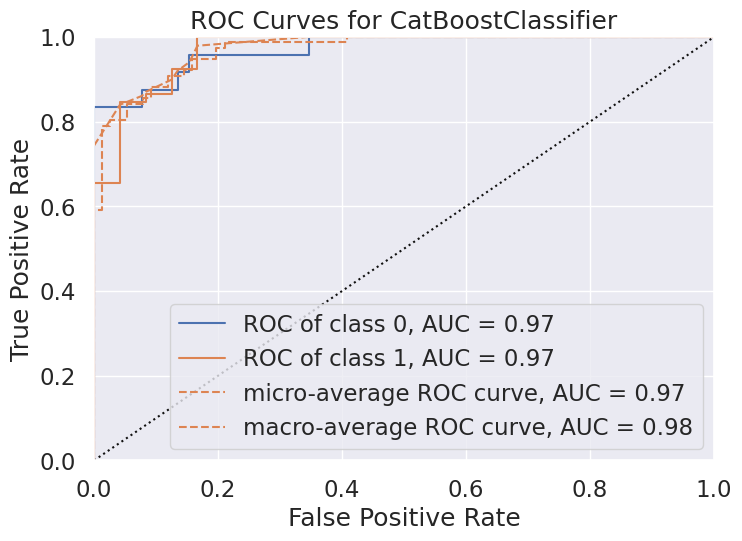

In [166]:
# plot AUC
plot_model(caret_result, plot = 'auc')

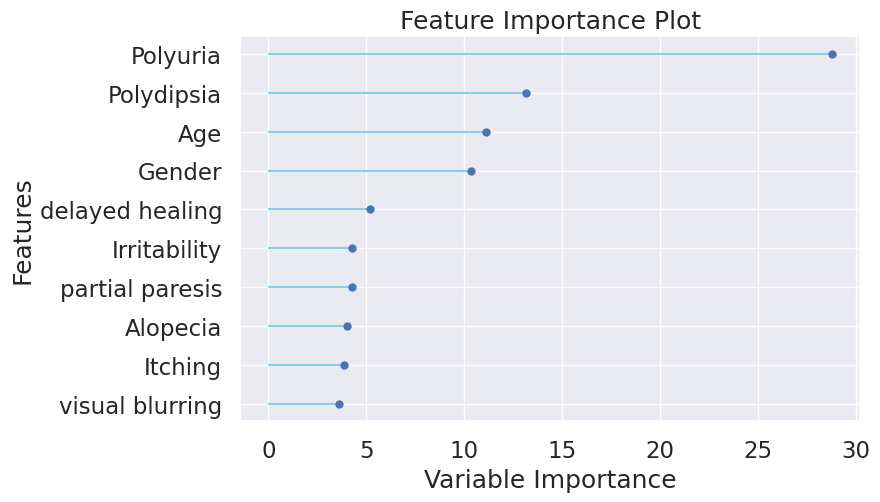

In [167]:
# plot feature importance
plot_model(caret_result, plot = 'feature')

In [168]:
evaluate_model(caret_result)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [169]:
# Save Model using pycaret

In [170]:
# save pipeline
save_model(caret_result, 'my_first_pipeline_with_pycaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Gender', 'Polyuria',
                                              'Polydipsia', 'sudden weight loss',
                                              'weakness', 'Polyphagia',
                                              'Genital thrush',
                                              'visual blurring', 'Itching',
                                              'Irritability', 'delayed healing',
                                              'partial paresis',
                                              'muscle stiffness', 'Alopecia',
                                              'Obesity'],
                                     transformer=SimpleImputer(add...
                                     transformer=SimpleImputer(add_indicator=False,
                                                               co

In [171]:
# load pipeline
load_pipeline = load_model('my_first_pipeline_with_pycaret')
load_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'Gender', 'Polyuria',
                                             'Polydipsia', 'sudden weight loss',
                                             'weakness', 'Polyphagia',
                                             'Genital thrush',
                                             'visual blurring', 'Itching',
                                             'Irritability', 'delayed healing',
                                             'partial paresis',
                                             'muscle stiffness', 'Alopecia',
                                             'Obesity'],
                                    transformer=Simple...
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x7dd4aec69480>)],
         verbose=False)